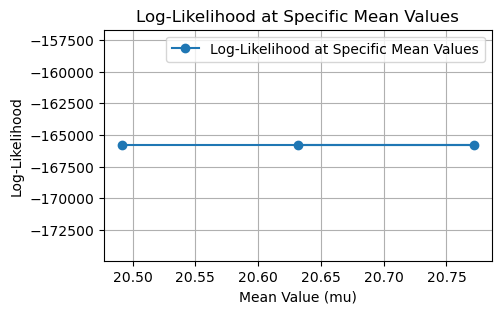

Log Likelihood Values: [-165817.77826682583, -165817.77826682577, -165817.7782668258]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = 'lcparam_full_long.txt'

# Read the first line to get the header
with open(file_path, 'r') as file:
    header_line = file.readline().strip()  # Read and strip the first line
    header = header_line.lstrip('#').strip()  # Remove leading '#' and any extra whitespace

# Remove the last word from the header
header_words = header.split()  # Split into words
header_words.pop()  # Remove the last word
header = ' '.join(header_words)  # Join the remaining words back into a string

# Read the rest of the file into a DataFrame
data = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)  # Skip the first line and don't set headers

# Set the header for the DataFrame
data.columns = header.split()  # Set columns using the stripped header

# Extract relevant columns
d = data['mb'].values
dmb = data['dmb'].values

# Define the log-likelihood function
def log_likelihood(d, mu, Sigma):
    """
    Compute the log-likelihood for a given set of parameters and data.

    Parameters:
    d (np.array): Observed data.
    mu (np.array): Mean values (theoretical predictions).
    Sigma (np.array): Covariance matrix.

    Returns:
    float: Log-likelihood value.
    """
    # Compute the inverse of the covariance matrix
    Sigma_inv = np.linalg.inv(Sigma)

    # Compute the residuals
    Delta = d - mu

    # Vector of ones
    ones = np.ones_like(d)

    # Compute the terms
    term1 = Delta.T @ Sigma_inv @ Delta
    term2 = (ones.T @ Sigma_inv @ Delta)**2 / (ones.T @ Sigma_inv @ ones)

    # Compute the log-likelihood
    lnLm = -0.5 * (term1 - term2)

    return lnLm

# Compute the covariance matrix (assuming it is diagonal with dmb as standard deviations)
Sigma = np.diag(dmb**2)

# Calculate specific mean values to test
mean_d = np.mean(d)
mean_dmb = np.mean(dmb)

# Define specific mu values based on the mean of d and dmb
mu_values = [mean_d, mean_d + mean_dmb, mean_d - mean_dmb]

# Compute log-likelihood for each value of mu
log_likelihood_values = [log_likelihood(d, np.full_like(d, mu), Sigma) for mu in mu_values]

# Plot the log-likelihood values
plt.figure(figsize=(5, 3))
plt.plot(mu_values, log_likelihood_values, 'o-', label='Log-Likelihood at Specific Mean Values')
plt.xlabel('Mean Value (mu)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood at Specific Mean Values')
plt.legend()
plt.grid(True)
plt.show()

print("Log Likelihood Values:", log_likelihood_values)

     name     zcmb     zhel   dz        mb      dmb  x1  dx1  color  dcolor  \
0  03D1au  0.50309  0.50309  0.0  22.93445  0.12605   0    0      0       0   
1  03D1ax  0.49480  0.49480  0.0  22.88020  0.11765   0    0      0       0   
2  03D1co  0.67767  0.67767  0.0  24.03770  0.20560   0    0      0       0   
3  03D1ew  0.86650  0.86650  0.0  24.34685  0.17385   0    0      0       0   
4  03D1fq  0.79857  0.79857  0.0  24.36050  0.17435   0    0      0       0   

   3rdvar  d3rdvar  cov_m_s  cov_m_c  cov_s_c  set  ra  dec  
0       0        0        0        0        0    0   0    0  
1       0        0        0        0        0    0   0    0  
2       0        0        0        0        0    0   0    0  
3       0        0        0        0        0    0   0    0  
4       0        0        0        0        0    0   0    0  
Covariance Matrix (Sigma):
[[0.0158886  0.         0.         ... 0.         0.         0.        ]
 [0.         0.01384152 0.         ... 0.         0. 

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/marigalla/anaconda3/envs/acc-env/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:00<00:00, 2269.14it/s]


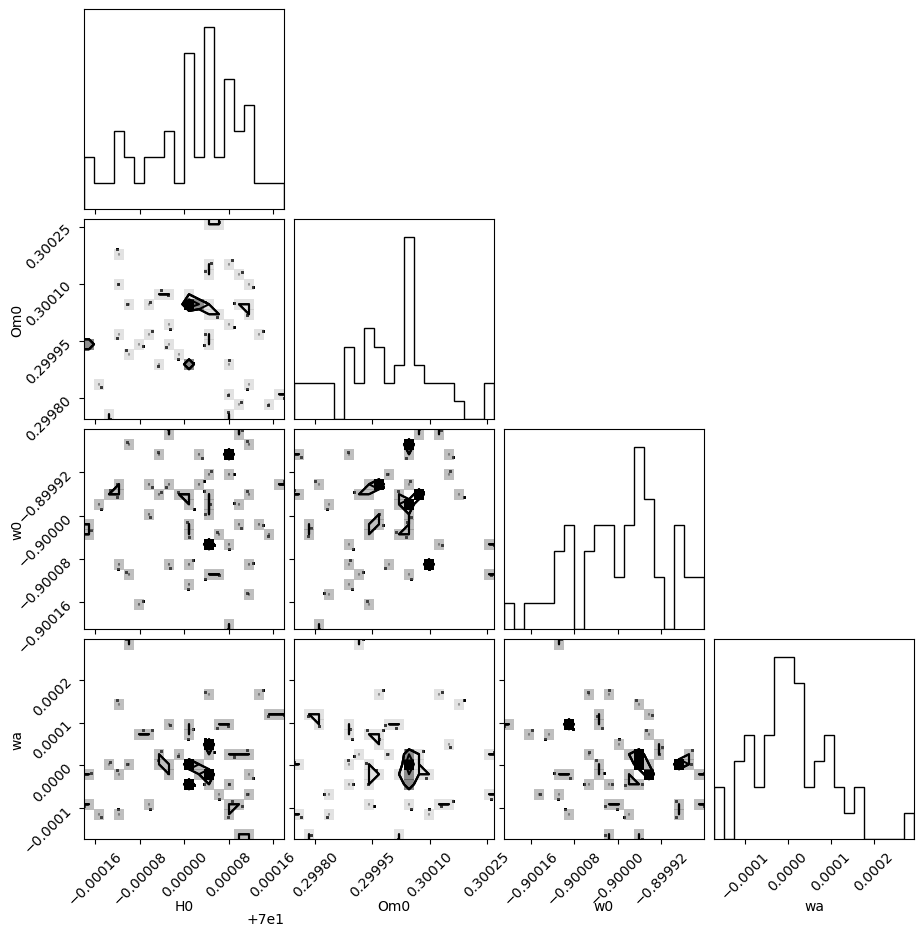

'\nnwalkers = 50\nndim = 4\ninitial = [70, 0.3, -1, 0]  # Initial guess for H0, Om0, w0, wa\npos = initial + 1e-4 * np.random.randn(nwalkers, ndim)\n\nsampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(data, Sigma_inv))\nsampler.run_mcmc(pos, 5000, progress=True)\n\n# Get the MCMC samples\nsamples = sampler.get_chain(discard=100, thin=15, flat=True)\n\n# Plot the results\nfig = corner.corner(samples, labels=["H0", "Om0", "w0", "wa"], truths=[70, 0.3, -1, 0])\n'

In [2]:
import pandas as pd
import numpy as np
import camb
import emcee
import corner

# Load the data
file_path = 'lcparam_full_long.txt'

# Read the first line to get the header
with open(file_path, 'r') as file:
    header_line = file.readline().strip()
    header = header_line.lstrip('#').strip()

# Remove the last word from the header (assumed to be 'biascor')
header_words = header.split()
header_words.pop()
header = ' '.join(header_words)

# Read the rest of the file into a DataFrame
data = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)
data.columns = header.split()

# Extract relevant columns
d = data['mb'].values
dmb = data['dmb'].values

# Compute the covariance matrix
Sigma = np.diag(dmb**2)
Sigma_inv = np.linalg.inv(Sigma)

# Check the data and covariance matrix
print(data.head())
print("Covariance Matrix (Sigma):")
print(Sigma)
print("Inverse Covariance Matrix (Sigma_inv):")
print(Sigma_inv)

# Define the cosmological model
def get_mu(z, H0, Om0, w0, wa):
    # Configure CAMB parameters
    pars = camb.CAMBparams()
    pars.set_dark_energy(w=w0, wa=wa)
    pars.set_cosmology(H0=H0, ombh2=0.022, omch2=Om0*0.12)
    pars.InitPower.set_params(ns=0.965)
    results = camb.get_results(pars)
    
    # Get luminosity distance in Mpc
    dl = results.comoving_radial_distance(z) * (1 + z)
    
    # Convert to distance modulus
    mu = 5 * np.log10(dl) + 25
    return mu

# Define the likelihood function
def ln_likelihood(params, data, cov_inv):
    H0, Om0, w0, wa = params
    z = data['zcmb'].values
    d = data['mb'].values
    mu = get_mu(z, H0, Om0, w0, wa)
    
    diff = d - mu
    term1 = -0.5 * diff @ cov_inv @ diff
    term2 = 0.5 * ((np.ones_like(diff) @ cov_inv @ diff) ** 2) / (np.ones_like(diff) @ cov_inv @ np.ones_like(diff))
    return term1 + term2

# Define the log-posterior function
def log_posterior(params, data, cov_inv):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + ln_likelihood(params, data, cov_inv)

# Modify the prior range for w0 to exclude values close to -1
def log_prior(params):
    H0, Om0, w0, wa = params
    if 0 < H0 < 100 and 0 < Om0 < 1 and -2 < w0 < -0.99 and -2 < wa < 2:
        return 0.0
    return -np.inf

# Initialize the MCMC sampler
# keeping in mind that i have to exclude values of w0 close to -1
initial = np.array([70, 0.3, -0.9, 0.0])
ndim = len(initial)
nwalkers = 50
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(data, Sigma_inv))

# Run the MCMC sampler
nsteps = 1000
sampler.run_mcmc(pos, nsteps, progress=True)

# Get the samples
samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Plot the results
fig = corner.corner(samples, labels=["H0", "Om0", "w0", "wa"])
plt.show()

'''
nwalkers = 50
ndim = 4
initial = [70, 0.3, -1, 0]  # Initial guess for H0, Om0, w0, wa
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(data, Sigma_inv))
sampler.run_mcmc(pos, 5000, progress=True)

# Get the MCMC samples
samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Plot the results
fig = corner.corner(samples, labels=["H0", "Om0", "w0", "wa"], truths=[70, 0.3, -1, 0])
'''


In [3]:
import sys
import platform
import os
import pandas as pd
import numpy as np
import emcee
import corner
import matplotlib.pyplot as plt

# Path setup for CAMB
_camb_path = os.path.join(os.path.dirname(os.path.abspath('.')), 'CAMB')
sys.path.insert(0, _camb_path)

import camb
print('Using CAMB %s installed at %s' % (camb.__version__, os.path.dirname(camb.__file__)))

# Load the data
file_path = 'lcparam_full_long.txt'

# Read the first line to get the header
with open(file_path, 'r') as file:
    header_line = file.readline().strip()
    header = header_line.lstrip('#').strip()

# Remove the last word from the header (assumed to be 'biascor')
header_words = header.split()
header_words.pop()
header = ' '.join(header_words)

# Read the rest of the file into a DataFrame
data = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)
data.columns = header.split()

# Extract relevant columns
z = data['zcmb'].values
d = data['mb'].values
dmb = data['dmb'].values

# Compute the covariance matrix
Sigma = np.diag(dmb**2)
Sigma_inv = np.linalg.inv(Sigma)

# Define the cosmological model
def get_mu(z, H0, Om0, w0, wa):
    # Check for phantom divide crossing
    w = w0 + wa * (z / (1 + z))
    if np.any(w > -1):
        crossing_indices = np.where(w > -1)[0]
        crossing_redshifts = z[crossing_indices]
        print(f"Invalid w crossing -1 at redshifts: {crossing_redshifts}")
        return np.nan  # Handle crossing by returning NaN or some error value

    # Configure CAMB parameters
    try:
        pars = camb.CAMBparams()
        pars.set_dark_energy(w=w0, wa=wa)
        pars.set_cosmology(H0=H0, ombh2=0.022, omch2=Om0*0.12)
        pars.InitPower.set_params(ns=0.965)
        results = camb.get_results(pars)
    
        # Get luminosity distance in Mpc
        dl = results.comoving_radial_distance(z) * (1 + z)
        
        # Convert to distance modulus
        mu = 5 * np.log10(dl) + 25
        return mu
    except camb.CAMBError as e:
        print(f"CAMB Error: {e}")
        return np.nan  # Handle CAMB error

# Test the function with given parameters
mu = get_mu(z, 70, 0.3, -1.3, -0.3)
print(mu)


Using CAMB 1.5.4 installed at /Users/marigalla/anaconda3/envs/acc-env/lib/python3.9/site-packages/camb
CAMB Error: fluid dark energy model does not support w crossing -1
nan


100%|██████████| 1000/1000 [00:44<00:00, 22.67it/s]


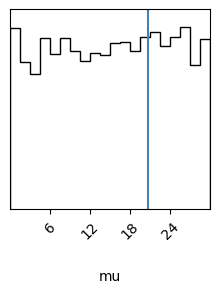

Mean of mu: 15.177817637856142
Standard deviation of mu: 8.659155226330556


In [4]:
import pandas as pd
import numpy as np
import emcee
import corner
import matplotlib.pyplot as plt

# Load the data
file_path = 'lcparam_full_long.txt'

# Read the first line to get the header
with open(file_path, 'r') as file:
    header_line = file.readline().strip()
    header = header_line.lstrip('#').strip()

# Remove the last word from the header
header_words = header.split()
header_words.pop()
header = ' '.join(header_words)

# Read the rest of the file into a DataFrame
data = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)
data.columns = header.split()

# Extract relevant columns
d = data['mb'].values
dmb = data['dmb'].values

# Compute the covariance matrix
Sigma = np.diag(dmb**2)
Sigma_inv = np.linalg.inv(Sigma)

# Log-likelihood function
def log_likelihood(params, d, Sigma_inv):
    mu = params[0]
    Delta = d - mu
    ones = np.ones_like(d)
    
    term1 = Delta.T @ Sigma_inv @ Delta
    term2 = (ones.T @ Sigma_inv @ Delta)**2 / (ones.T @ Sigma_inv @ ones)
    
    return -0.5 * (term1 - term2)

# Log-prior function
def log_prior(params):
    mu = params[0]
    if 0 < mu < 30:
        return 0.0
    return -np.inf

# Log-posterior function
def log_posterior(params, d, Sigma_inv):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, d, Sigma_inv)

# Initial guess for the parameter
initial = np.array([np.mean(d)])

# Number of dimensions
ndim = len(initial)

# Number of walkers
nwalkers = 50

# Initial positions of the walkers
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

# Set up the MCMC sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(d, Sigma_inv))

# Run the MCMC sampler
nsteps = 1000
sampler.run_mcmc(pos, nsteps, progress=True)

# Get the samples
samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Plot the results
fig = corner.corner(samples, labels=["mu"], truths=[np.mean(d)])
plt.show()

# Print the mean and standard deviation of the posterior distribution
mu_mcmc = np.mean(samples)
mu_std = np.std(samples)
print(f"Mean of mu: {mu_mcmc}")
print(f"Standard deviation of mu: {mu_std}")
